ACCESSING ALL 4 FILES


In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

ACCESSING FOURTH DATASET FILE

In [136]:
ddf = pd.read_csv(r'data/consumer-price-indices_phl.csv')
ddf.shape #(799, 16)

#dropping the unneeded columns
ddf.drop('Iso3', inplace=True, axis=1)
ddf.drop('Area Code', inplace=True, axis=1)
ddf.drop('Area Code (M49)', inplace=True, axis=1)
ddf.drop('Year Code', inplace=True, axis=1)

#dropping unneeded rows
ddf.drop(index=0, axis=0, inplace=True)

#assigning 0 to null/NaN values
ddf.fillna(0)

#changing string Year to int and dropping some rows
ddf['Year'] = pd.to_numeric(ddf['Year'])
ddf['Value'] = pd.to_numeric(ddf['Value'])
ddf.drop(ddf[(ddf['Year'] < 2010)].index, inplace=True)
ddf.drop(ddf[(ddf['Year'] > 2020)].index, inplace=True)

food = ddf.loc[ddf['Item']=="Consumer Prices, Food Indices (2015 = 100)"]
general = ddf.loc[ddf['Item']=="Consumer Prices, General Indices (2015 = 100)"]
ddf['Item'].unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Consumer Prices, General Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

GETTING AVERAGE VALUES of FOOD INDECES

In [138]:
food_2010 = food.loc[food['Year'] == 2010]
averageVal1 = round(food_2010['Value'].mean(), 2)

food_2011 = food.loc[food['Year'] == 2011]
averageVal2 = round(food_2011['Value'].mean(), 2)
#formula repeats until year 2020

food_2012 = food.loc[food['Year'] == 2012]
averageVal3 = round(food_2012['Value'].mean(), 2)

food_2013 = food.loc[food['Year'] == 2013]
averageVal4 = round(food_2013['Value'].mean(), 2)

food_2014 = food.loc[food['Year'] == 2014]
averageVal5 = round(food_2014['Value'].mean(), 2)

food_2015 = food.loc[food['Year'] == 2015]
averageVal6 = round(food_2015['Value'].mean(), 2)

food_2016 = food.loc[food['Year'] == 2016]
averageVal7 = round(food_2016['Value'].mean(), 2)

food_2017 = food.loc[food['Year'] == 2017]
averageVal8 = round(food_2017['Value'].mean(), 2)

food_2018 = food.loc[food['Year'] == 2018]
averageVal9 = round(food_2018['Value'].mean(), 2)

food_2019 = food.loc[food['Year'] == 2019]
averageVal10 = round(food_2019['Value'].mean(), 2)

food_2020 = food.loc[food['Year'] == 2020]
averageVal11 = round(food_2020['Value'].mean(), 2)

ave_list = [averageVal1, averageVal2, averageVal3, 
    averageVal4, averageVal5, averageVal6, averageVal7, 
    averageVal8, averageVal9, averageVal10, averageVal11]
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
print(ave_list)


[83.56, 88.13, 90.49, 92.79, 98.15, 100.0, 101.58, 104.68, 111.86, 114.16, 117.29]


GETTING EVERAGE VALUES FOR GENERAL INDECES

In [139]:
general_2010 = general.loc[general['Year'] == 2010]
Val1 = round(general_2010['Value'].mean(), 2)

general_2011 = general.loc[general['Year'] == 2011]
Val2 = round(general_2011['Value'].mean(), 2)
#formula repeats until year 2020

general_2011 = general.loc[general['Year'] == 2012]
Val3 = round(general_2011['Value'].mean(), 2)

general_2013 = general.loc[general['Year'] == 2013]
Val4 = round(general_2013['Value'].mean(), 2)

general_2014 = general.loc[general['Year'] == 2014]
Val5 = round(general_2014['Value'].mean(), 2)

general_2015 = general.loc[general['Year'] == 2015]
Val6 = round(general_2015['Value'].mean(), 2)

general_2016 = general.loc[general['Year'] == 2016]
Val7 = round(general_2016['Value'].mean(), 2)

general_2017 = general.loc[general['Year'] == 2017]
Val8 = round(general_2017['Value'].mean(), 2)

general_2018 = general.loc[general['Year'] == 2018]
Val9 = round(general_2014['Value'].mean(), 2)

general_2019 = general.loc[general['Year'] == 2019]
Val10 = round(general_2019['Value'].mean(), 2)

general_2020 = general.loc[general['Year'] == 2020]
Val11 = round(general_2020['Value'].mean(), 2)

gen_ave_list = [Val1, Val2, Val3, Val4, Val5, Val6, Val7, Val8, 
                Val9, Val10, Val11]
print(gen_ave_list)

[86.63, 90.72, 93.47, 95.88, 99.33, 100.0, 101.25, 104.14, 99.33, 112.3, 114.98]


PLOTTING

<Figure size 800x800 with 0 Axes>

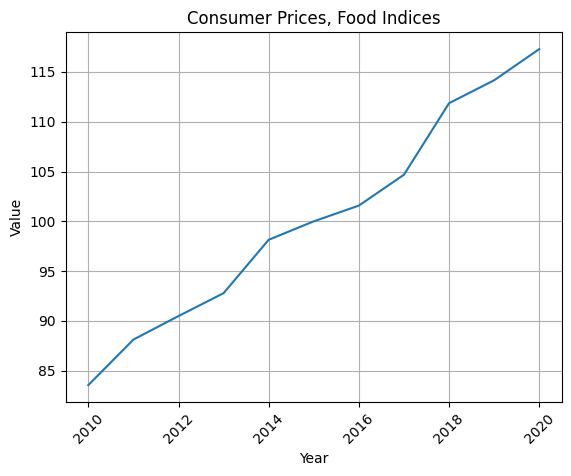

In [141]:
plt_7 = plt.figure(figsize=(8, 8))

fig, ax = plt.subplots()
plt.title("Consumer Prices, Food Indices")
plt.xlabel("Year")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(year_list, ave_list, label="buffalo")

#show legend to show labels, and position outside the plot
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<Figure size 800x600 with 0 Axes>

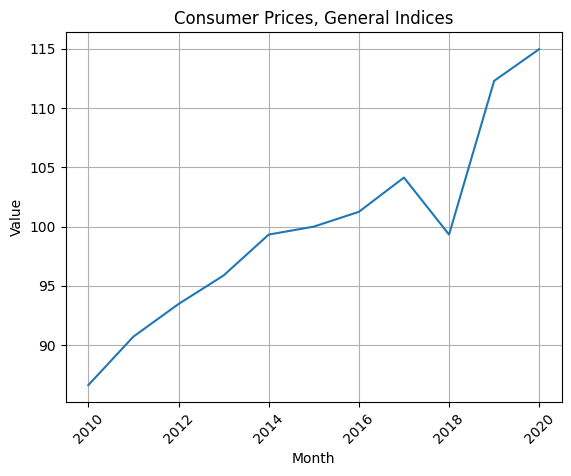

In [142]:
plt_7 = plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
plt.title("Consumer Prices, General Indices")
plt.xlabel("Month")
plt.ylabel("Value")
ax.grid()

#rotating the x-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#plot to compare local and international prices
ax.plot(year_list, gen_ave_list, label="buffalo")

#show legend to show labels, and position outside the plot
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    CALCULATING THE DEGREE OF CHANGE OVER TIME - FOOD INDECES

In [179]:
origVal = ave_list[0]

for i in range(1, len(ave_list)):
    newVal = ave_list[i]
    
    if(newVal > origVal):
        left = newVal
        right = origVal
        denominator = right
    else:
        left = origVal
        right = newVal
        denominator = left
    
    difference = round(left-right, 2)
    deci_change = round(difference/denominator, 4)
    per_change = round(deci_change*100, 2)
    print(per_change)
    origVal = newVal

5.47
2.68
2.54
5.78
1.88
1.58
3.05
6.86
2.06
2.74


    CALCULATING THE DEGREE OF CHANGE OVER TIME - GENERAL INDECES

In [180]:
origVal = gen_ave_list[0]

for i in range(1, len(gen_ave_list)):
    newVal = ave_list[i]
    
    if(newVal > origVal):
        left = newVal
        right = origVal
        denominator = right
    else:
        left = origVal
        right = newVal
        denominator = left
    
    difference = round(left-right, 2)
    deci_change = round(difference/denominator, 4)
    per_change = round(deci_change*100, 2)
    print(per_change)
    origVal = newVal

1.73
2.68
2.54
5.78
1.88
1.58
3.05
6.86
2.06
2.74


MAKE DATAFRAME TO PUT THE PERCENTAGE CHANGE